In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

data = pd.read_csv('advertising.csv')
k = 5 # number of neighbours in knn model
X = data[['TV', 'Radio']] # No newspapers, since it doesnt matter
Y = data['Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, Y_train)
Y_predictions = knn_model.predict(X_test)
r2 = r2_score(Y_test, Y_predictions)

print(f"For a knn model with a hiperparameter k = {k}, r2 score = {r2}")

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

knn_normalized = KNeighborsRegressor(n_neighbors=k)
knn_normalized.fit(X_train_normalized, Y_train)
Y_normalized_predictions = knn_normalized.predict(X_test_normalized)
r2_normalized = r2_score(Y_test, Y_normalized_predictions)

print(f"For a knn model on normalized data and a hiperparameter k = {k}, r2 score = {r2_normalized}")





For a knn model with a hiperparameter k = 5, r2 score = 0.943048952949895
For a knn model on normalized data and a hiperparameter k = 5, r2 score = 0.8920734213345156


For a threshold = 0.1, 
 r2 score = -0.3658732825237394 
 accuracy = 0.6592028660994178 
 f1 score = 0.7356721083709621
For a threshold = 0.25, 
 r2 score = 0.22642393591625265 
 accuracy = 0.8069861173309449 
 f1 score = 0.8235775685632419
For a threshold = 0.5, 
 r2 score = 0.2336032961397677 
 accuracy = 0.8087774294670846 
 f1 score = 0.7942168674698795
For a threshold = 0.75, 
 r2 score = 0.009248289154922262 
 accuracy = 0.7527989252127183 
 f1 score = 0.6831228473019518
For a threshold = 0.9, 
 r2 score = -0.3048487206238615 
 accuracy = 0.6744290192566055 
 f1 score = 0.5057783820530252


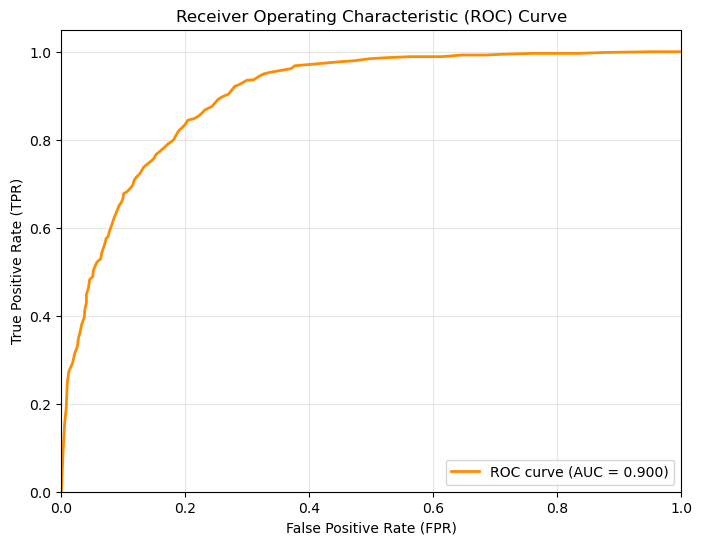

Based on the given rates, the optimal threshold is 0.8200000000000001 with an accuracy of 0.728616211374832, r2 score = -0.08767307386253109 and f1 score = 0.6291309669522643
Index(['duration', 'poutcome_success'], dtype='object')

Accuracy at threshold 0.82: 0.697
              precision    recall  f1-score   support

           0       0.64      0.95      0.77      1166
           1       0.89      0.42      0.57      1067

    accuracy                           0.70      2233
   macro avg       0.77      0.69      0.67      2233
weighted avg       0.76      0.70      0.67      2233



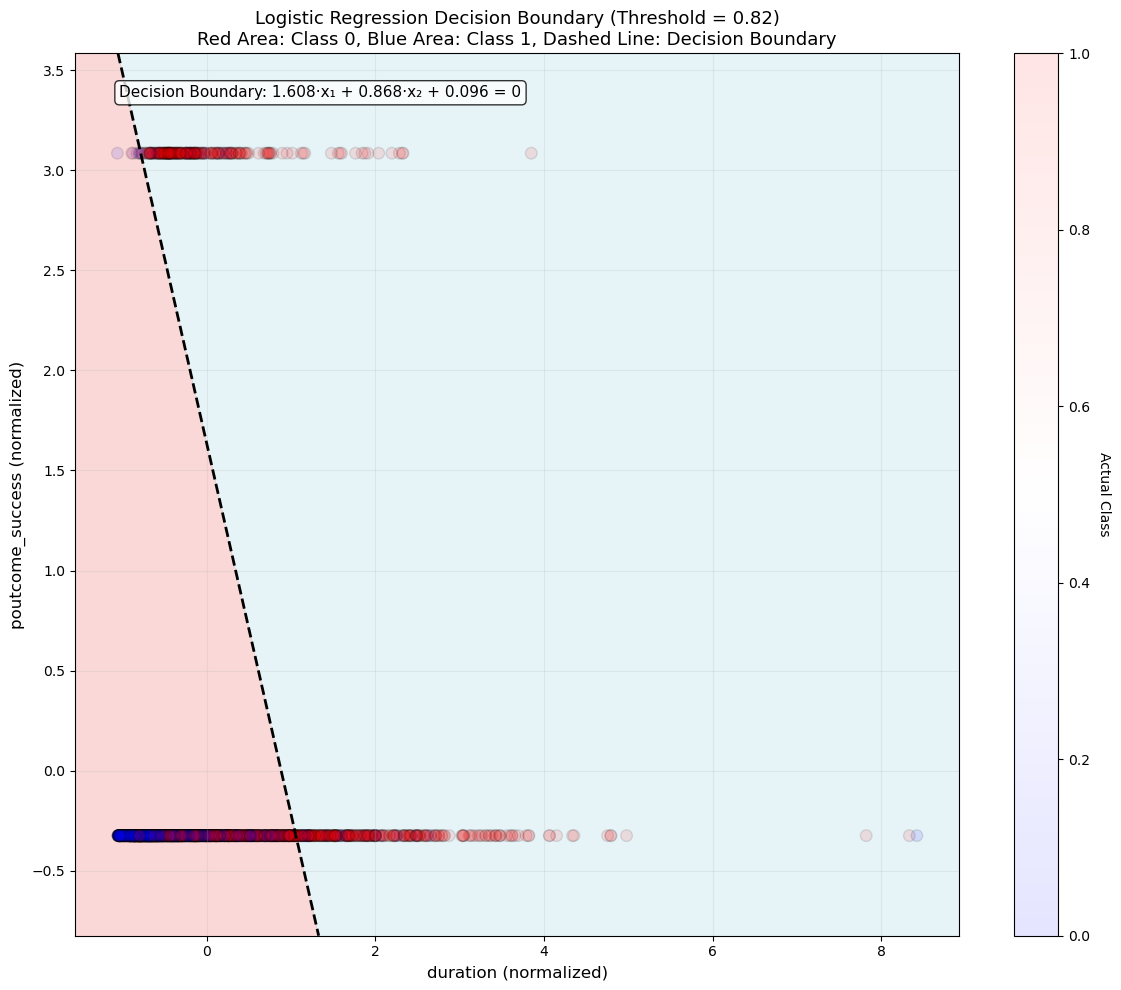

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, classification_report
import matplotlib.pyplot as plt



data2 = pd.read_csv('bank.csv')
target_encoder = LabelEncoder()
data2['deposit_encoded'] = target_encoder.fit_transform(data2['deposit'])
X = data2.drop(['deposit', 'deposit_encoded'], axis=1)
Y = data2['deposit_encoded']

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, train_size = 0.8, random_state=42)
thresholds = [0.1, 0.25, 0.5, 0.75, 0.9]  

# we normalize data so all is equally important with the one hot encoded ones
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

logistic_model = LogisticRegression(random_state = 42)
logistic_model.fit(X_train_normalized, Y_train)
# This will return a table of pairs - that sum up to 1 - (probability of class1, prob of class 2)
Y_predictions_probabilities = logistic_model.predict_proba(X_test_normalized)[:, 1]

for t in thresholds:
    Y_predictions = (Y_predictions_probabilities >= t).astype(int)
    accuracy = accuracy_score(Y_test, Y_predictions)
    precision = precision_score(Y_test, Y_predictions)
    recall = recall_score(Y_test, Y_predictions)
    f1 = f1_score(Y_test, Y_predictions)
    r2 = r2_score(Y_test, Y_predictions)
    print(f"For a threshold = {t}, \n r2 score = {r2} \n accuracy = {accuracy} \n f1 score = {f1}")
 

thresholds = np.arange(0.0, 1.01, 0.01)
TPRs = [] # true positive rates
FPRs = [] # false positive rates
t_optimal = -1
opt_rate = 10e10
for t in thresholds:
    Y_predictions = (Y_predictions_probabilities >= t).astype(int)
    
    TP = np.sum((Y_predictions == 1) & (Y_test == 1))
    FP = np.sum((Y_predictions == 1) & (Y_test == 0))
    TN = np.sum((Y_predictions == 0) & (Y_test == 0))
    FN = np.sum((Y_predictions == 0) & (Y_test == 1))
    
    if (FP * 10 + FN * 3) < opt_rate:
        opt_rate = FP * 10 + FN * 3
        t_optimal = t

    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    
    TPRs.append(TPR)
    FPRs.append(FPR)

fpr, tpr, _ = roc_curve(Y_test, Y_predictions_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(FPRs, TPRs, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

Y_predictions = (Y_predictions_probabilities >= t_optimal).astype(int)
accuracy = accuracy_score(Y_test, Y_predictions)
precision = precision_score(Y_test, Y_predictions)
recall = recall_score(Y_test, Y_predictions)
f1 = f1_score(Y_test, Y_predictions)
r2 = r2_score(Y_test, Y_predictions)

print(f"Based on the given rates, the optimal threshold is {t_optimal} with an accuracy of {accuracy}, r2 score = {r2} and f1 score = {f1}")

correlations = X_encoded.corrwith(Y).abs().sort_values(ascending=False)
two_predictors = correlations.index[0:2]
print(two_predictors)
X2 = X_encoded[two_predictors]
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y, train_size=0.8, random_state=42)

scaler2 = StandardScaler()
X2_train_normalized = scaler2.fit_transform(X2_train)
X2_test_normalized = scaler2.transform(X2_test)

logistic_model2 = LogisticRegression(random_state=42)
logistic_model2.fit(X2_train_normalized, Y2_train)

coefs = logistic_model2.coef_[0]
intercept = logistic_model2.intercept_[0]

Y2_probability = logistic_model2.predict_proba(X2_test_normalized)[:, 1]
t = 0.82
Y2_predictions = (Y2_probability >= t).astype(int)
accuracy = accuracy_score(Y2_test, Y2_predictions)
print(f"\nAccuracy at threshold {t}: {accuracy:.3f}")
print(classification_report(Y2_test, Y2_predictions))

x_min, x_max = X2_test_normalized[:, 0].min() - 0.5, X2_test_normalized[:, 0].max() + 0.5
y_min, y_max = X2_test_normalized[:, 1].min() - 0.5, X2_test_normalized[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = logistic_model2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 10))

contour = plt.contourf(xx, yy, Z, levels=[0, t, 1], alpha=0.3, 
                       colors=['lightcoral', 'lightblue'])
plt.contour(xx, yy, Z, levels=[t], linewidths=2, colors='black', linestyles='dashed')

scatter = plt.scatter(X2_test_normalized[:, 0], X2_test_normalized[:, 1], 
                     c=Y2_test, cmap='bwr', alpha=0.1, edgecolors='black', s=70)

plt.xlabel(f'{two_predictors[0]} (normalized)', fontsize=12)
plt.ylabel(f'{two_predictors[1]} (normalized)', fontsize=12)
plt.title(f'Logistic Regression Decision Boundary (Threshold = {t})\n'
          f'Red Area: Class 0, Blue Area: Class 1, Dashed Line: Decision Boundary', fontsize=13)
cbar = plt.colorbar(scatter)
cbar.set_label('Actual Class', rotation=270, labelpad=15)

# equation of decision boundary
boundary_eq = f'Decision Boundary: {coefs[0]:.3f}·x₁ + {coefs[1]:.3f}·x₂ + {intercept:.3f} = 0'
plt.text(0.05, 0.95, boundary_eq, transform=plt.gca().transAxes, fontsize=11,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


Zadanie 3:

- Embeddingi to zamiana produktów na wielowymiarowe wektory 
- Meta dane tutaj to szczegółowe dane o produktach, w tym jego kategorie i asin czyli unikatowe identyfikatory produktów
- 

In [4]:
import pickle
import gzip
import ast

with open('embeddings.pkl', 'rb') as f:
    embeddings = pickle.load(f)

asin_index_map = {}
item_ids_set = set()
with open('item_list.txt', 'r') as f:
    next(f)
    for line in f:
        asin, idx = line.strip().split()
        asin_index_map[asin] = int(idx)
        item_ids_set.add(asin)

asin_category_map = {}
with gzip.open('meta_Books.json.gz', 'rt', encoding='utf-8') as f:
    for line in f:
        try:
            metadata = ast.literal_eval(line)
        except:
            continue
        asin = metadata.get('asin')
        if asin in item_ids_set:
            categories = metadata['categories']
            # Pierwsza z listy kategoria produktu jest kategoria glowna
            asin_category_map[asin] = categories[0]


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from scipy.spatial.distance import cosine, euclidean
import numpy as np

main_categories = []
sub_categories = []
valid_indices = []

for asin, idx in asin_index_map.items():
    if asin in asin_category_map:
        categories = asin_category_map[asin]
        if categories:  
            main_categories.append(categories[0])
            sub_categories.append(categories[1] if len(categories) > 1 else None)
            valid_indices.append(idx)

filtered_embeddings = embeddings[valid_indices]

# Dla kategorii głównych
X_train, X_test, y_train, y_test = train_test_split(
    filtered_embeddings, main_categories, test_size=0.2, random_state=42
)

for metric_name in ['cosine', 'euclidean']:
    knn = KNeighborsClassifier(metric=metric_name, n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Metryka: {metric_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("---")

# Klasyfikacja podkategorii
subcat_data = []
subcat_labels = []

for i, subcat in enumerate(sub_categories):
    if subcat is not None:
        subcat_data.append(filtered_embeddings[i])
        subcat_labels.append(subcat)

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
    np.array(subcat_data), subcat_labels, test_size=0.2, random_state=42
)

for metric_name in ['cosine', 'euclidean']:
    knn_sub = KNeighborsClassifier(metric=metric_name, n_neighbors=5)
    knn_sub.fit(X_train_sub, y_train_sub)
    y_pred_sub = knn_sub.predict(X_test_sub)
    
    accuracy = accuracy_score(y_test_sub, y_pred_sub)
    f1 = f1_score(y_test_sub, y_pred_sub, average='weighted')
    
    print(f"Metryka: {metric_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("---")

Metryka: cosine
Accuracy: 1.0000
F1-score: 1.0000
---
Metryka: euclidean
Accuracy: 1.0000
F1-score: 1.0000
---
Metryka: cosine
Accuracy: 0.8506
F1-score: 0.8306
---
Metryka: euclidean
Accuracy: 0.8091
F1-score: 0.7973
---


In [8]:
# ---------------- task 4
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools import add_constant

data = pd.read_csv('adult.csv')
data['income_binary'] = (data['income'] == '>50K').astype(int)

X_numeric = data[['age', 'fnlwgt', 'education.num', 'capital.gain', 
                  'capital.loss', 'hours.per.week']].copy()
# one hot encoding for non numerical collumns
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation',
                    'relationship', 'race', 'sex', 'native.country']
X_categorical = pd.get_dummies(data[categorical_cols], drop_first=True)
X_categorical = X_categorical.astype(int)
X_numeric = X_numeric.astype(float)
X = pd.concat([X_numeric, X_categorical], axis=1)
Y = data['income_binary']
X = add_constant(X)

used_variables = ['const']
remaining_variables = [col for col in X.columns if col != "const"]
current_model = sm.Logit(Y, X[used_variables]).fit()

print(f"Baseline model with just a constant has AIC: {current_model.aic:.4f} and BIC: {current_model.bic:.4f}")

improvement = True;
while (improvement and remaining_variables):
    best_aic = current_model.aic
    best_var = None
    # selecting a variable that improves the model the most 
    for var in remaining_variables:
        temp_vars = used_variables + [var]
        temp_model = sm.OLS(Y, X[temp_vars]).fit()
        if (temp_model.aic < best_aic):
            best_aic = temp_model.aic
            best_var = var
            best_model = temp_model
    # Measuring the imporvement with this variable
    if best_var is not None:
        used_variables.append(best_var)
        remaining_variables.remove(best_var)
        current_model = best_model
        print(f"Added variable: {best_var}. New AIC = {current_model.aic:.4f} and BIC = {current_model.bic:.4f}")
    else:
        improvement = False



Optimization terminated successfully.
         Current function value: 0.552011
         Iterations 5
Baseline model with just a constant has AIC: 35950.0794 and BIC: 35958.4703
Added variable: marital.status_Married-civ-spouse. New AIC = 29904.2697 and BIC = 29921.0515
Added variable: education.num. New AIC = 26086.9072 and BIC = 26112.0798
Added variable: capital.gain. New AIC = 25013.2472 and BIC = 25046.8107
Added variable: occupation_Exec-managerial. New AIC = 24458.6601 and BIC = 24500.6145
Added variable: capital.loss. New AIC = 23997.6952 and BIC = 24048.0404
Added variable: hours.per.week. New AIC = 23689.7451 and BIC = 23748.4812
Added variable: age. New AIC = 23389.9311 and BIC = 23457.0580
Added variable: occupation_Prof-specialty. New AIC = 23186.8316 and BIC = 23262.3494
Added variable: workclass_Self-emp-not-inc. New AIC = 23090.6332 and BIC = 23174.5419
Added variable: occupation_Sales. New AIC = 22986.4118 and BIC = 23078.7114
Added variable: occupation_Tech-support. N

In [9]:
print(f"Number of variables: {len(used_variables)-1}")
print(f"Used Variables: {used_variables[1:]}")
print(f"R2 Score: {current_model.rsquared:.4f}")
print(f"AIC: {current_model.aic:.3f}")
print(f"BIC: {current_model.bic:.3f}")
print(current_model.summary())

Number of variables: 51
Used Variables: ['marital.status_Married-civ-spouse', 'education.num', 'capital.gain', 'occupation_Exec-managerial', 'capital.loss', 'hours.per.week', 'age', 'occupation_Prof-specialty', 'workclass_Self-emp-not-inc', 'occupation_Sales', 'occupation_Tech-support', 'education_HS-grad', 'sex_Male', 'relationship_Wife', 'workclass_Federal-gov', 'occupation_Farming-fishing', 'workclass_Self-emp-inc', 'education_Assoc-acdm', 'occupation_Protective-serv', 'education_Some-college', 'education_Bachelors', 'education_Assoc-voc', 'workclass_Private', 'marital.status_Married-AF-spouse', 'race_White', 'occupation_Adm-clerical', 'relationship_Not-in-family', 'fnlwgt', 'native.country_United-States', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'education_1st-4th', 'education_5th-6th', 'education_Preschool', 'occupation_Transport-moving', 'native.country_Philippines', 'native.country_Italy', 'native.country_Germany', 'native.country_Cambodia', 'native.countr

In [4]:
import pandas as pd
import numpy as np
# --------------------- task 5
data5 = pd.read_csv("Titanic Dataset.csv")

print("Empty ratios for columns")
for col in data5.columns:
    print(f" - {col}: {(data5[col].isna().sum() / len(data5[col])) * 100:.2f}")

# Numerical columns - age, aibsp, parch, fare, boat, body - only age, fare, boat has empty vals
numerical_cols = ['age', 'boat']
categorical_cols = ['pclass', 'sex', 'survived']

for ncol in numerical_cols:
    print(f"\nAnalysis for column {ncol}")
    print(f"No. of empty rows: {data5[ncol].isna().sum()}")
    missing_rows = data5[data5[ncol].isna()]
    for col in categorical_cols:
        distribution = missing_rows[col].value_counts().sort_index()
        print(f"\nDistribution for {col}: ")
        for value, count in distribution.items():
            percentage = (count / len(missing_rows)) * 100
            print(f"{value}: {count} rows ({percentage:.1f}% of empty spots)")


Empty ratios for columns
 - pclass: 0.00
 - survived: 0.00
 - name: 0.00
 - sex: 0.00
 - age: 20.09
 - sibsp: 0.00
 - parch: 0.00
 - ticket: 0.00
 - fare: 0.08
 - cabin: 77.46
 - embarked: 0.15
 - boat: 62.87
 - body: 90.76
 - home.dest: 43.09

Analysis for column age
No. of empty rows: 263

Distribution for pclass: 
1: 39 rows (14.8% of empty spots)
2: 16 rows (6.1% of empty spots)
3: 208 rows (79.1% of empty spots)

Distribution for sex: 
female: 78 rows (29.7% of empty spots)
male: 185 rows (70.3% of empty spots)

Distribution for survived: 
0: 190 rows (72.2% of empty spots)
1: 73 rows (27.8% of empty spots)

Analysis for column boat
No. of empty rows: 823

Distribution for pclass: 
1: 122 rows (14.8% of empty spots)
2: 165 rows (20.0% of empty spots)
3: 536 rows (65.1% of empty spots)

Distribution for sex: 
female: 147 rows (17.9% of empty spots)
male: 676 rows (82.1% of empty spots)

Distribution for survived: 
0: 800 rows (97.2% of empty spots)
1: 23 rows (2.8% of empty spots)


In [5]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split


print("BASELINE model:")
baseline_data = data5.copy()
high_missing_cols = ['cabin', 'boat', 'body', 'home.dest']
baseline_data = baseline_data.drop(columns=high_missing_cols)

numeric_cols_empty = ['age', 'fare']
for col in numeric_cols_empty:
    mean = baseline_data[col].mean()
    baseline_data[col] = baseline_data[col].fillna(mean)

categoric_cols_empty = ['embarked']
for col in categoric_cols_empty:
    freq_val = baseline_data[col].mode()[0]
    baseline_data[col] = baseline_data[col].fillna(freq_val)

Y = baseline_data['survived']
X = baseline_data.drop('survived', axis = 1)
numeric_columns = X.select_dtypes(include=[np.number]).columns
categorical_columns = X.select_dtypes(include=['object']).columns
X_categorical = pd.get_dummies(X[categorical_columns], drop_first=True)
X_numeric = X[numeric_columns]
X = pd.concat([X_numeric, X_categorical], axis=1)

model_baseline = LogisticRegression(max_iter = 1000)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
model_baseline.fit(X_train, Y_train)
Y_pred = model_baseline.predict(X_test)
print(f"R2 score = {r2_score(Y_test, Y_pred)}")
print(f"MSE = {mean_squared_error(Y_test, Y_pred)}")
print(f"Accuracy = {accuracy_score(Y_test, Y_pred)}")



print("ADVANCED model:")
advanced_data = data5.copy()
advanced_data['cabin'] = advanced_data['cabin'].notnull().astype(int)
def extract_title(name):
    title_mapping = {
        'Mr.' : 'Mr.', 'Ms.' : 'Ms.', 'Miss.' : 'Miss.',
        'Col.' : 'Col.', 'Mrs.' : 'Mrs.', 'Dr.' : 'Dr.',
        'Major.' : 'Major.', 'Master.' : 'Master.', 'Capt.' : 'Capt.'
    }
    for title in title_mapping:
        if title in name:
            return title_mapping[title]
    return 'Other.'

advanced_data['title'] = advanced_data['name'].apply(extract_title)
title_age_median = advanced_data.groupby('title')['age'].median()
for title in advanced_data['title'].unique():
    mask = (advanced_data['age'].isnull()) & (advanced_data['title'] == title)
    advanced_data.loc[mask, 'age'] = title_age_median[title]

high_missing_cols = ['boat', 'body', 'home.dest']
advanced_data = advanced_data.drop(columns=high_missing_cols)
numeric_cols_empty = ['fare']
for col in numeric_cols_empty:
    mean = advanced_data[col].mean()
    advanced_data[col] = advanced_data[col].fillna(mean)

categoric_cols_empty = ['embarked']
for col in categoric_cols_empty:
    freq_val = advanced_data[col].mode()[0]
    advanced_data[col] = advanced_data[col].fillna(freq_val)

Y = advanced_data['survived']
X = advanced_data.drop('survived', axis = 1)
numeric_columns = X.select_dtypes(include=[np.number]).columns
categorical_columns = X.select_dtypes(include=['object']).columns
X_categorical = pd.get_dummies(X[categorical_columns], drop_first=True)
X_numeric = X[numeric_columns]
X = pd.concat([X_numeric, X_categorical], axis=1)

model_advanced = LogisticRegression(max_iter = 1000)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
model_advanced.fit(X_train, Y_train)
Y_pred = model_advanced.predict(X_test)
print(f"R2 score = {r2_score(Y_test, Y_pred)}")
print(f"MSE = {mean_squared_error(Y_test, Y_pred)}")
print(f"Accuracy = {accuracy_score(Y_test, Y_pred)}")


BASELINE model:
R2 score = 0.13653483992467075
MSE = 0.21374045801526717
Accuracy = 0.7862595419847328
ADVANCED model:
R2 score = 0.21362994350282516
MSE = 0.1946564885496183
Accuracy = 0.8053435114503816
